<a href="https://colab.research.google.com/github/Natural-Language-Processing-YU/Exercises/blob/main/M5_Example_Word2Vec_Shakespeare_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


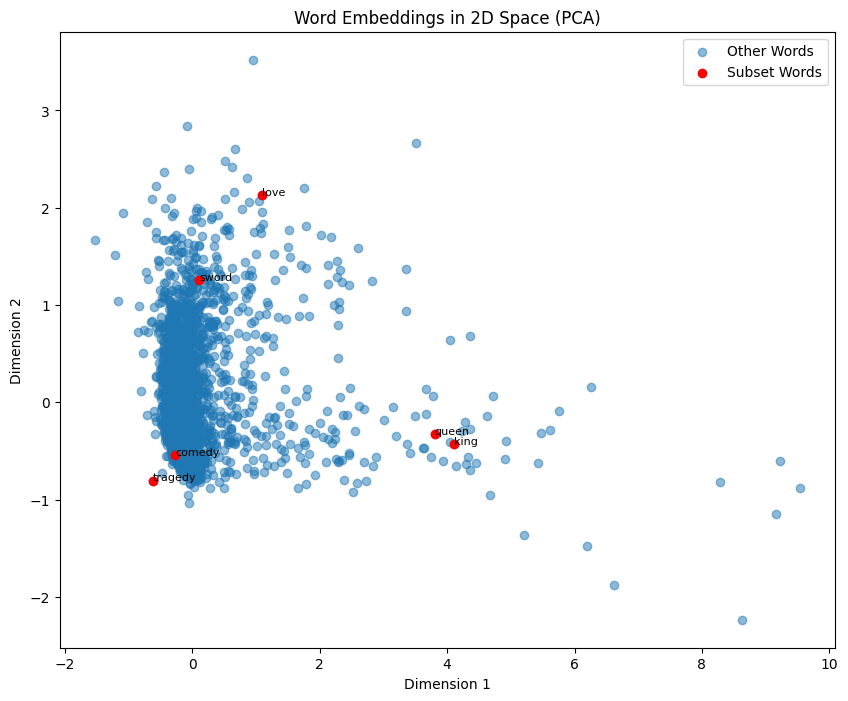

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download stopwords and Punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('shakespeare')

# Load the text corpus (example: Shakespeare plays)
from nltk.corpus import shakespeare

# Combine all the text from the Shakespeare plays
corpus = ' '.join([shakespeare.raw(fileid) for fileid in shakespeare.fileids()])

# Tokenize the text into sentences and words
sentences = nltk.sent_tokenize(corpus)
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]

# Remove stopwords from the tokenized sentences
stop_words = set(stopwords.words('english'))
filtered_sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in tokenized_sentences]

# Train the Word2Vec model
model = Word2Vec(filtered_sentences, vector_size=100, window=5, min_count=5, workers=4)

# Perform dimensionality reduction with PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(model.wv[model.wv.key_to_index])

# Extract a subset of word vectors for visualization
subset_words = ['king', 'queen', 'sword', 'love', 'tragedy', 'comedy']
subset_vectors = [model.wv[word] for word in subset_words]
subset_vectors_2d = pca.transform(subset_vectors)

# Plot the word vectors in a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5, label='Other Words')
plt.scatter(subset_vectors_2d[:, 0], subset_vectors_2d[:, 1], color='red', label='Subset Words')
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(subset_vectors_2d[i, 0], subset_vectors_2d[i, 1]), fontsize=8)
plt.title("Word Embeddings in 2D Space (PCA)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()
